In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('train.csv')
print(df.head(5))
print(df.shape)

   Id  LotArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   1     8450             1             0         2         1             3   
1   2     9600             0             1         2         0             3   
2   3    11250             1             0         2         1             3   
3   4     9550             1             0         1         0             3   
4   5    14260             1             0         2         1             4   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  
(1460, 8)


<Axes: >

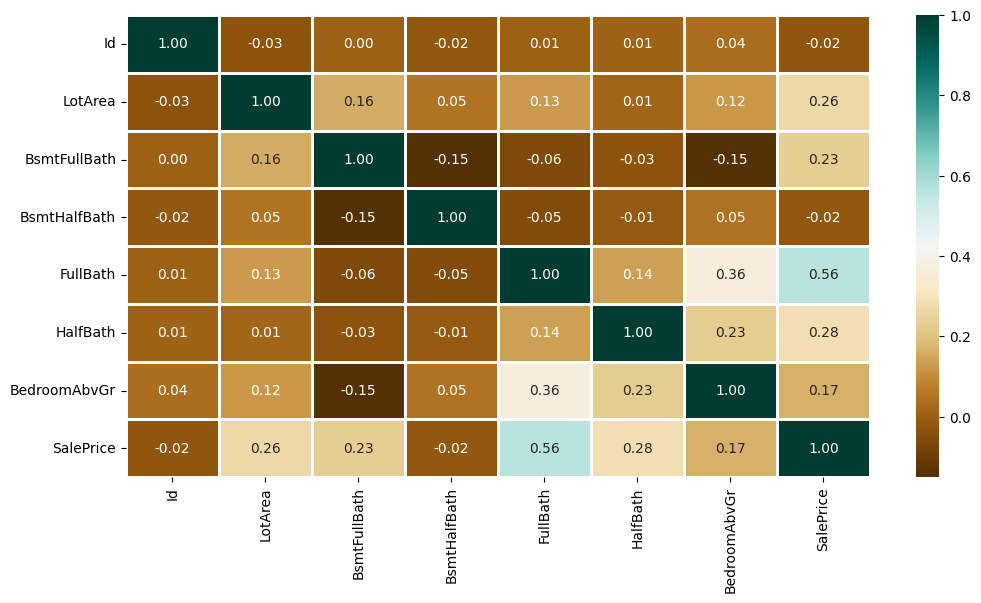

In [8]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [9]:
df.drop(['Id'],axis=1,inplace=True)

In [11]:
df['SalePrice'] = df['SalePrice'].fillna(
df['SalePrice'].mean())
df = df.dropna()

In [14]:
from sklearn.model_selection import train_test_split
 
X = df.drop(['SalePrice'], axis=1)
Y = df['SalePrice']
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.24402931670429


In [35]:
df = pd.read_csv('test.csv')
df.fillna(0, inplace=True)
df = df.dropna()
ids = df['Id']
df.drop(['Id'],axis=1,inplace=True)

pred = model_LR.predict(df)

In [36]:
newdf = pd.DataFrame({'Id': ids, 'SalePrice': pred})
print(newdf.head(5))
newdf.to_csv('submission.csv', index=False)

     Id      SalePrice
0  1461  110191.026573
1  1462  144268.426816
2  1463  224721.264790
3  1464  220293.578108
4  1465  183540.255072


In [37]:
newdf

,Id,SalePrice
0,1461,110191.026573
1,1462,144268.426816
2,1463,224721.264790
3,1464,220293.578108
4,1465,183540.255072
...,...,...
1454,2915,130094.541956
1455,2916,130046.264998
1456,2917,145850.133782
1457,2918,121354.966100
